# Import libraries

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
import mllib

# Import dataset

Import and read dataset:

In [6]:
trainingData = pd.read_csv('csv/cleaned/trainingData_clean.csv',index_col=0)

In [7]:
validationData = pd.read_csv('csv/validationData.csv')

In [8]:
X_train = pd.read_csv('csv/transformed/X_train.csv',index_col=0)

In [9]:
X_test = pd.read_csv('csv/transformed/X_test.csv',index_col=0)

In [10]:
X_val = pd.read_csv('csv/transformed/X_val.csv',index_col=0)

# Predict building_floor

## Create new feature

To predict building and floor lets define a unique number, that has  building and floor in it:

In [11]:
trainingData['building_floor'] = trainingData['BUILDINGID']*10 + trainingData['FLOOR']

In [12]:
validationData['building_floor'] = validationData['BUILDINGID']*10 + validationData['FLOOR']

For example: 23 is building 2, floor 3

## Define target

In [13]:
y_train = list(trainingData.loc[X_train.index,['building_floor']]['building_floor'])

In [14]:
y_test = list(trainingData.loc[X_test.index,['building_floor']]['building_floor'])

In [15]:
y_val = list(validationData.loc[X_val.index,['building_floor']]['building_floor'])

## Decision tree

In [16]:
# collect accuracy of models
accuracy_train = {}
accuracy_test = {}
accuracy_val = {}

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
tree = DecisionTreeClassifier(max_depth=50, random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=50, random_state=42)

<AxesSubplot:>

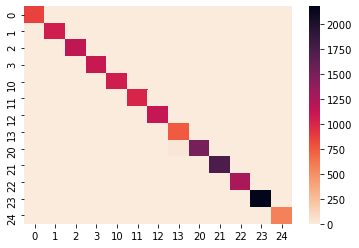

In [19]:
# train
acc_scor = mllib.model_check(y_train, tree.predict(X_train), tree)
accuracy_train['DT'] = acc_scor
sns.heatmap(mllib.model_check(y_train, 
                              tree.predict(X_train), 
                              tree, 
                              output ='cmatrix'),
           cmap='rocket_r')

<AxesSubplot:>

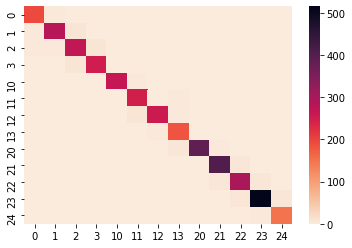

In [20]:
# test
acc_scor = mllib.model_check(y_test, tree.predict(X_test), tree)
accuracy_test['DT'] = acc_scor
sns.heatmap(mllib.model_check(y_test, 
                              tree.predict(X_test), 
                              tree, 
                              output ='cmatrix'),
           cmap='rocket_r')

<AxesSubplot:>

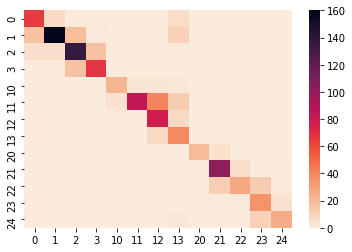

In [21]:
# val
acc_scor = mllib.model_check(y_val, tree.predict(X_val), tree)
accuracy_val['DT'] = acc_scor
mllib.model_check(y_val, tree.predict(X_val), tree, output ='cmatrix')
sns.heatmap(mllib.model_check(y_val, 
                              tree.predict(X_val), 
                              tree, 
                              output ='cmatrix'),
           cmap='rocket_r')

## Knearest neighbors

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3,weights='distance')
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

<AxesSubplot:>

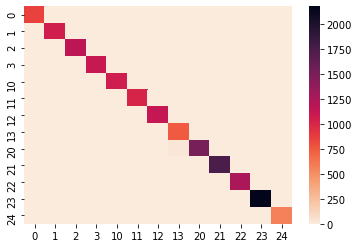

In [23]:
# train 
acc_scor = mllib.model_check(y_train, knn.predict(X_train), knn)
accuracy_train['KNN'] = acc_scor
sns.heatmap(mllib.model_check(y_train, 
                              knn.predict(X_train), 
                              knn, 
                              output ='cmatrix'),
           cmap='rocket_r')

<AxesSubplot:>

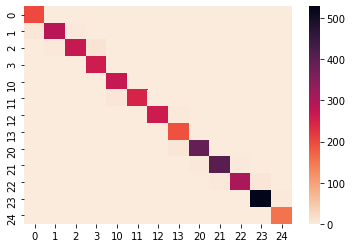

In [24]:
# test
acc_scor = mllib.model_check(y_test, knn.predict(X_test), knn)
accuracy_test['KNN'] = acc_scor
sns.heatmap(mllib.model_check(y_test, 
                              knn.predict(X_test), 
                              knn, 
                              output ='cmatrix'),
           cmap='rocket_r')

<AxesSubplot:>

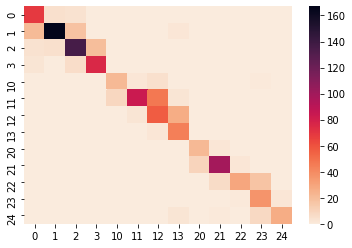

In [25]:
# val
acc_scor = mllib.model_check(y_val, knn.predict(X_val), knn)
accuracy_val['KNN'] = acc_scor
sns.heatmap(mllib.model_check(y_val, 
                              knn.predict(X_val), 
                              knn, 
                              output ='cmatrix'),
           cmap='rocket_r')

## Logistic regression

Performs slow with big number of categories (for example building-floor)

In [26]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(max_iter=1000)
lg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

<AxesSubplot:>

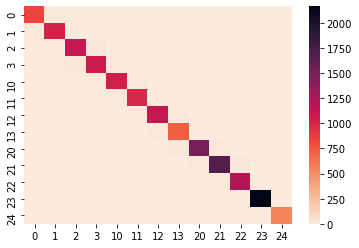

In [27]:
# train
acc_scor = mllib.model_check(y_train, lg.predict(X_train), lg)
accuracy_train['LR'] = acc_scor
sns.heatmap(mllib.model_check(y_train, 
                              lg.predict(X_train), 
                              lg, 
                              output ='cmatrix'),
           cmap='rocket_r')

<AxesSubplot:>

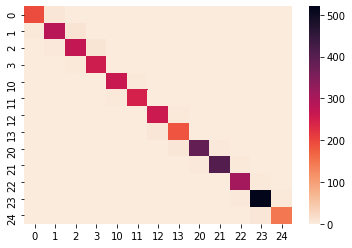

In [28]:
# test
acc_scor = mllib.model_check(y_test, lg.predict(X_test), lg)
accuracy_test['LR'] = acc_scor
sns.heatmap(mllib.model_check(y_test, 
                              lg.predict(X_test), 
                              lg, 
                              output ='cmatrix'),
           cmap='rocket_r')

<AxesSubplot:>

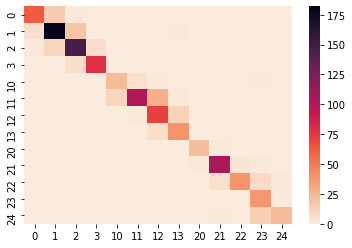

In [29]:
# val
acc_scor = mllib.model_check(y_val, lg.predict(X_val), lg)
accuracy_val['LR'] = acc_scor
sns.heatmap(mllib.model_check(y_val, 
                              lg.predict(X_val), 
                              lg, 
                              output ='cmatrix'),
           cmap='rocket_r')

## Random forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
rf = RandomForestClassifier(n_estimators=100, max_depth=30, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, random_state=42)

<AxesSubplot:>

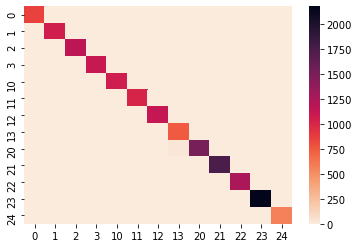

In [32]:
# train
acc_scor = mllib.model_check(y_train, rf.predict(X_train), rf)
accuracy_train['RF'] = acc_scor
sns.heatmap(mllib.model_check(y_train, 
                              rf.predict(X_train), 
                              rf, 
                              output ='cmatrix'),
           cmap='rocket_r')

<AxesSubplot:>

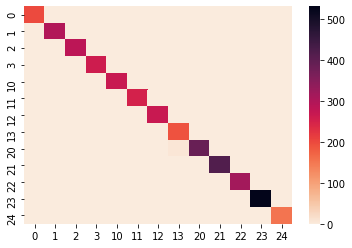

In [33]:
# test
acc_scor = mllib.model_check(y_test, rf.predict(X_test), rf)
accuracy_test['RF'] = acc_scor
sns.heatmap(mllib.model_check(y_test, 
                              rf.predict(X_test), 
                              rf, 
                              output ='cmatrix'),
           cmap='rocket_r')

<AxesSubplot:>

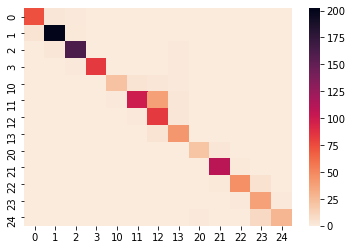

In [34]:
# val
acc_scor = mllib.model_check(y_val, rf.predict(X_val), rf)
accuracy_val['RF'] = acc_scor
sns.heatmap(mllib.model_check(y_val, 
                              rf.predict(X_val), 
                              rf, 
                              output ='cmatrix'),
           cmap='rocket_r')

## Support Vector Machine

Performs slow with big number of categories (for example building-floor)

In [35]:
from sklearn.svm import SVC

In [36]:
svm = SVC(probability=True)
svm.fit(X_train, y_train)

SVC(probability=True)

<AxesSubplot:>

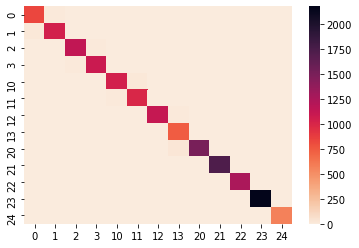

In [37]:
# train
acc_scor = mllib.model_check(y_train, svm.predict(X_train), svm)
accuracy_train['SVM'] = acc_scor
sns.heatmap(mllib.model_check(y_train, 
                              svm.predict(X_train), 
                              svm, 
                              output ='cmatrix'),
           cmap='rocket_r')

<AxesSubplot:>

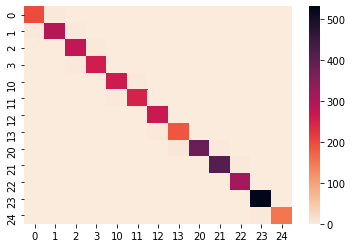

In [38]:
# test
acc_scor = mllib.model_check(y_test, svm.predict(X_test), svm)
accuracy_test['SVM'] = acc_scor
sns.heatmap(mllib.model_check(y_test, 
                              svm.predict(X_test), 
                              svm, 
                              output ='cmatrix'),
           cmap='rocket_r')

<AxesSubplot:>

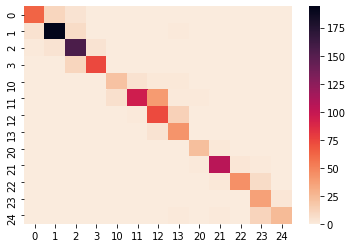

In [39]:
# val
acc_scor = mllib.model_check(y_val, svm.predict(X_val), svm)
accuracy_val['SVM'] = acc_scor
sns.heatmap(mllib.model_check(y_val, 
                              svm.predict(X_val), 
                              svm, 
                              output ='cmatrix'),
           cmap='rocket_r')

## COMPARE accuracy of models

In [40]:
accuracy_df = pd.DataFrame({'accuracy':accuracy_train.values(),'set':['train']*len(accuracy_train),'model':accuracy_train.keys()})
accuracy_df_test = pd.DataFrame({'accuracy':accuracy_test.values(),'set':['test']*len(accuracy_test),'model':accuracy_test.keys()})
accuracy_df_val = pd.DataFrame({'accuracy':accuracy_val.values(),'set':['val']*len(accuracy_val),'model':accuracy_val.keys()})
accuracy_df = accuracy_df.append([accuracy_df_test,accuracy_df_val],ignore_index=True)

In [41]:
accuracy_df

,accuracy,set,model
0,0.996693,train,DT
1,0.997990,train,KNN
2,0.977951,train,LR
3,0.997925,train,RF
4,0.989040,train,SVM
5,0.963174,test,DT
6,0.979253,test,KNN
7,0.968620,test,LR
8,0.996110,test,RF
9,0.985737,test,SVM


## Export results

In [42]:
accuracy_df.to_csv('csv/visualization/accuracy_df.csv')

# Predict longitude, lattitude

In [43]:
from sklearn.metrics import mean_squared_error, r2_score

In [44]:
regression_models = pd.DataFrame(columns=['target','model','dataset','mean_squared_error','r2_score'])

## LONGITUDE

### Define target

In [45]:
y_train = list(trainingData.loc[X_train.index,['LONGITUDE']]['LONGITUDE'])
y_test = list(trainingData.loc[X_test.index,['LONGITUDE']]['LONGITUDE'])
y_val = list(validationData.loc[X_val.index,['LONGITUDE']]['LONGITUDE'])

### Random Forest Regression

In [46]:
from sklearn.ensemble import RandomForestRegressor

In [47]:
rfr_long = RandomForestRegressor(random_state=42)
rfr_long.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [48]:
# Predict LONGITUDE for test dataset
y_pred = rfr_long.predict(X_test)

In [49]:
# test
temp_df = pd.DataFrame({'target':['LONGITUDE'],
                        'model':['RFR'],
                        'dataset':'test',
                        'mean_squared_error':mean_squared_error(y_test, y_pred),
                        'r2_score':r2_score(y_test, y_pred)})

regression_models = regression_models.append(temp_df,ignore_index=True)

In [50]:
# validation
y_pred = rfr_long.predict(X_val)
temp_df = pd.DataFrame({'target':['LONGITUDE'],
                        'model':['RFR'],
                        'dataset':'val',
                        'mean_squared_error':mean_squared_error(y_val, y_pred),
                        'r2_score':r2_score(y_val, y_pred)})
regression_models = regression_models.append(temp_df,ignore_index=True)

### KNN Regression

In [51]:
from sklearn.neighbors import KNeighborsRegressor

In [52]:
knnr_long = KNeighborsRegressor(n_neighbors=5,leaf_size=11)
knnr_long.fit(X_train,y_train)

KNeighborsRegressor(leaf_size=11)

In [53]:
# Predict LONGITUDE for test dataset
y_pred = knnr_long.predict(X_test)

In [54]:
# the mean squared error and
# the coefficient of determination: 1 is perfect prediction
temp_df = pd.DataFrame({'target':['LONGITUDE'],
                        'model':['KNNR'],
                        'dataset':'test',
                        'mean_squared_error':mean_squared_error(y_test, y_pred),
                        'r2_score':r2_score(y_test, y_pred)})


regression_models = regression_models.append(temp_df,ignore_index=True)

In [55]:
# validation
y_pred = knnr_long.predict(X_val)
temp_df = pd.DataFrame({'target':['LONGITUDE'],
                        'model':['KNNR'],
                        'dataset':'val',
                        'mean_squared_error':mean_squared_error(y_val, y_pred),
                        'r2_score':r2_score(y_val, y_pred)})
regression_models = regression_models.append(temp_df,ignore_index=True)

### Decision tree Regression

In [56]:
from sklearn.tree import DecisionTreeRegressor

In [57]:
dtr_long = DecisionTreeRegressor(max_depth=50, random_state=42)
dtr_long.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=50, random_state=42)

In [58]:
# Predict LONGITUDE for test dataset
y_pred = dtr_long.predict(X_test)

In [59]:
# the mean squared error and
# the coefficient of determination: 1 is perfect prediction
temp_df = pd.DataFrame({'target':['LONGITUDE'],
                        'model':['DTR'],
                        'dataset':'test',
                        'mean_squared_error':mean_squared_error(y_test, y_pred),
                        'r2_score':r2_score(y_test, y_pred)})

regression_models = regression_models.append(temp_df,ignore_index=True)

In [60]:
# validation
y_pred = dtr_long.predict(X_val)
temp_df = pd.DataFrame({'target':['LONGITUDE'],
                        'model':['DTR'],
                        'dataset':'val',
                        'mean_squared_error':mean_squared_error(y_val, y_pred),
                        'r2_score':r2_score(y_val, y_pred)})
regression_models = regression_models.append(temp_df,ignore_index=True)

## LATITUDE

### Define target

In [61]:
y_train = list(trainingData.loc[X_train.index,['LATITUDE']]['LATITUDE'])
y_test = list(trainingData.loc[X_test.index,['LATITUDE']]['LATITUDE'])
y_val = list(validationData.loc[X_val.index,['LATITUDE']]['LATITUDE'])

### Random Forest Regression

In [62]:
rfr_lat = RandomForestRegressor(random_state=42)
rfr_lat.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [63]:
# Predict LONGITUDE for test dataset
y_pred = rfr_lat.predict(X_test)

In [64]:
# the mean squared error and
# the coefficient of determination: 1 is perfect prediction

temp_df = pd.DataFrame({'target':['LATITUDE'],
                        'model':['RFR'],
                        'dataset':'test',
                        'mean_squared_error':mean_squared_error(y_test, y_pred),
                        'r2_score':r2_score(y_test, y_pred)})
regression_models = regression_models.append(temp_df,ignore_index=True)

In [65]:
# validation
y_pred = rfr_lat.predict(X_val)
temp_df = pd.DataFrame({'target':['LATITUDE'],
                        'model':['RFR'],
                        'dataset':'val',
                        'mean_squared_error':mean_squared_error(y_val, y_pred),
                        'r2_score':r2_score(y_val, y_pred)})
regression_models = regression_models.append(temp_df,ignore_index=True)

### KNN Regression

In [66]:
from sklearn.neighbors import KNeighborsRegressor

In [67]:
knnr_lat = KNeighborsRegressor(n_neighbors=5, leaf_size=11,weights='distance')
knnr_lat.fit(X_train,y_train)

KNeighborsRegressor(leaf_size=11, weights='distance')

In [68]:
# the mean squared error and
# the coefficient of determination: 1 is perfect prediction
temp_df = pd.DataFrame({'target':['LATITUDE'],
                        'model':['KNNR'],
                        'dataset':'test',
                        'mean_squared_error':mean_squared_error(y_val, y_pred),
                        'r2_score':r2_score(y_val, y_pred)})

regression_models = regression_models.append(temp_df,ignore_index=True)

In [69]:
# validation
y_pred = knnr_lat.predict(X_val)
temp_df = pd.DataFrame({'target':['LATITUDE'],
                        'model':['KNNR'],
                        'dataset':'val',
                        'mean_squared_error':mean_squared_error(y_val, y_pred),
                        'r2_score':r2_score(y_val, y_pred)})
regression_models = regression_models.append(temp_df,ignore_index=True)

### Decision tree Regression

In [70]:
from sklearn.tree import DecisionTreeRegressor

In [71]:
dtr_lat = DecisionTreeRegressor()
dtr_lat.fit(X_train, y_train)

DecisionTreeRegressor()

In [72]:
# Predict LONGITUDE for test dataset
y_pred = dtr_lat.predict(X_test)

In [73]:
# the mean squared error and
# the coefficient of determination: 1 is perfect prediction
temp_df = pd.DataFrame({'target':['LATITUDE'],
                        'model':['DTR'],
                        'dataset':'test',
                        'mean_squared_error':mean_squared_error(y_test, y_pred),
                        'r2_score':r2_score(y_test, y_pred)})

regression_models = regression_models.append(temp_df,ignore_index=True)

In [74]:
# validation
y_pred = dtr_lat.predict(X_val)
temp_df = pd.DataFrame({'target':['LATITUDE'],
                        'model':['DTR'],
                        'dataset':'val',
                        'mean_squared_error':mean_squared_error(y_val, y_pred),
                        'r2_score':r2_score(y_val, y_pred)})
regression_models = regression_models.append(temp_df,ignore_index=True)

## COMPARE MSE, R2

In [75]:
regression_models.style.format({
    "mean_squared_error":  "{:.2f}",
    "r2_score": "{:.2f}"
})
regression_models

,target,model,dataset,mean_squared_error,r2_score
0,LONGITUDE,RFR,test,61.937730,0.996042
1,LONGITUDE,RFR,val,194.375806,0.986537
2,LONGITUDE,KNNR,test,86.026785,0.994502
3,LONGITUDE,KNNR,val,290.669557,0.979867
4,LONGITUDE,DTR,test,96.875898,0.993809
5,LONGITUDE,DTR,val,257.443421,0.982168
6,LATITUDE,RFR,test,24.772982,0.994500
7,LATITUDE,RFR,val,175.605282,0.964408
8,LATITUDE,KNNR,test,175.605282,0.964408
9,LATITUDE,KNNR,val,216.972411,0.956023


In [76]:
regression_models.to_csv('csv/visualization/regression_models.csv')

## Predicted positions vs actual positions

### Train data

In [77]:
longitude_actual = list(trainingData.loc[X_train.index,['LONGITUDE']]['LONGITUDE'])
lattitude_actual = list(trainingData.loc[X_train.index,['LATITUDE']]['LATITUDE'])
longitude_predicted = rfr_long.predict(X_train)
lattitude_predicted = rfr_lat.predict(X_train)

positions_df_actual = pd.DataFrame({'LONGITUDE':longitude_actual,
                                    'LATITUDE':lattitude_actual}).reset_index()
positions_df_actual.index = X_train.index

positions_df_pred = pd.DataFrame({'LONGITUDE':longitude_predicted,
                                  'LATITUDE':lattitude_predicted}).reset_index()
positions_df_pred.index = X_train.index

In [78]:
positions_df_actual.to_csv('csv/visualization/positions_df_actual_train.csv')
positions_df_pred.to_csv('csv/visualization/positions_df_pred_train.csv')

### Test data

In [79]:
longitude_actual = list(trainingData.loc[X_test.index,['LONGITUDE']]['LONGITUDE'])
lattitude_actual = list(trainingData.loc[X_test.index,['LATITUDE']]['LATITUDE'])
longitude_predicted = rfr_long.predict(X_test)
lattitude_predicted = rfr_lat.predict(X_test)

positions_df_actual = pd.DataFrame({'LONGITUDE':longitude_actual,
                                    'LATITUDE':lattitude_actual}).reset_index()
positions_df_actual.index = X_test.index

positions_df_pred = pd.DataFrame({'LONGITUDE':longitude_predicted,
                                  'LATITUDE':lattitude_predicted}).reset_index()
positions_df_pred.index = X_test.index

In [80]:
positions_df_actual.to_csv('csv/visualization/positions_df_actual_test.csv')
positions_df_pred.to_csv('csv/visualization/positions_df_pred_test.csv')

### Validation data

In [81]:
longitude_actual = list(validationData.loc[X_val.index,['LONGITUDE']]['LONGITUDE'])
lattitude_actual = list(validationData.loc[X_val.index,['LATITUDE']]['LATITUDE'])
longitude_predicted = rfr_long.predict(X_val)
lattitude_predicted = rfr_lat.predict(X_val)

positions_df_actual = pd.DataFrame({'LONGITUDE':longitude_actual,
                                    'LATITUDE':lattitude_actual}).reset_index()
positions_df_actual.index = X_val.index

positions_df_pred = pd.DataFrame({'LONGITUDE':longitude_predicted,
                                  'LATITUDE':lattitude_predicted}).reset_index()
positions_df_pred.index = X_val.index

In [82]:
positions_df_actual.to_csv('csv/visualization/positions_df_actual_val.csv')
positions_df_pred.to_csv('csv/visualization/positions_df_pred_val.csv')